<a href="https://colab.research.google.com/github/santhi1712/python_work/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
print(dataset.data)
print(dataset.DESCR)

In [9]:
print(dataset.target)#house prices
print(dataset.feature_names) #col names

[4.526 3.585 3.521 ... 0.923 0.847 0.894]
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [11]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [13]:
df['House_Price'] = dataset.target
df.head()
df.info()#to get the info aboutr datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   House_Price  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
print(df.isnull().sum())#to get the null counts if any

In [15]:
corr = df.corr()
print(corr)#computes pairwise corelation of columns
# A perfect negative correlation is represented by the value –1.00:
# a 0.00 indicates no correlation and
#a +1.00 indicates a perfect positive correlation

               MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge    -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms     0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms   -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population   0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup     0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude    -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude   -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
House_Price  0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

             Latitude  Longitude  House_Price  
MedInc      -0.079809  -0.015176     0.688075  
HouseAge     0.011173  -0.108197     0.105623  
AveRooms     0.106389  -0.027540     0.151948  
AveBedrms    0.069721   0.0

In [22]:
 #---get the top 3 features that has the highest correlation---
 print(df.corr().abs().nlargest(3, 'House_Price').index) #print top3 features/cols
 print(df.corr().abs().nlargest(3, 'House_Price').values[:,8]) #---print the top 3 correlation values---


Index(['House_Price', 'MedInc', 'AveRooms'], dtype='object')
[1.         0.68807521 0.15194829]


now plot each feature against label

Text(0, 0.5, 'House_Price')

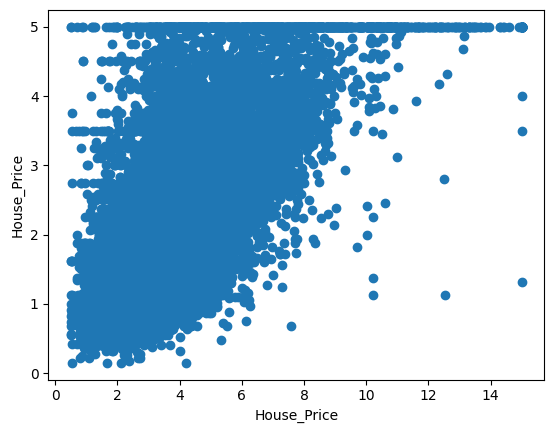

In [23]:
plt.scatter(df['MedInc'], df['House_Price'], marker='o')
plt.xlabel('House_Price')
plt.ylabel('House_Price')


Text(0, 0.5, 'House_Price')

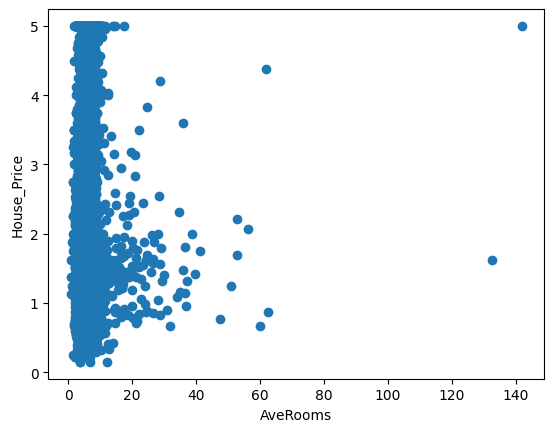

In [24]:
plt.scatter(df['AveRooms'], df['House_Price'], marker='o')
plt.xlabel('AveRooms')
plt.ylabel('House_Price')

In [ ]:
 from mpl_toolkits.mplot3d import Axes3D
 fig = plt.figure(figsize=(18,15))
 ax = fig.add_subplot(111, projection='3d')
 ax.scatter(df['MedInc'],
 df['AveRooms'],
 df['House_Price'],
 c='b')
 ax.set_xlabel("MedInc")
 ax.set_ylabel("AveRooms")
 ax.set_zlabel("House_Price")
 plt.show()

Now need to train the model
